# Scrap CellphoneS

In [ ]:
import csv
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC

In [ ]:
# # this notebook was originally run on linux using Google Chrome

#!sudo cp ./Downloads/chromedriver /usr/bin

In [ ]:
def get_details(url):
    """Extract the details of an item.
    
    Argument:
        url -- url to the item's page.
        
    Return:
        a dictionary containing all details scrapped for the specified item.
    """
    
    data = {}
        
    driver.get(url)

    soup = BeautifulSoup(driver.page_source, 'html.parser')
    
    data['url'] = url
    
    # name
    data['item_name'] = soup.find('div', {'class': 'box-name__box-product-name'}).h1.text.strip()

    # price
    price_box = soup.find('div', 'box-info__box-price')
    try:
        data['special_price'] = price_box.find('p', {'class': 'special-price'}).text[:-2]
    except:
        data['special_price'] = None
    try:
        data['old_price'] = price_box.find('p', {'class': 'old-price'}).text[:-2]
    except:
        data['old_price'] = None
    
    # versions with different prices
#     versions_raw = soup.find_all('a', 'item-linked')
    
#     if len(versions_raw) == 1:
#         print(url)
    
#     if len(versions_raw) > 0:
#         for version in versions_raw:
#             if version.get('href') not in url_list[-len(versions_raw):]:
#                 url_list.append(version.get('href'))

#     try:
#         data['version'] = versions_raw[0].span.text[:-2]
#     except:
#         data['version'] = None
    
    # rating
    rating_raw = soup.find_all('div', 'item-statistical')
    rating = {
        (level.find('p', 'number-star').strong.text + 'star'): level.find('p', 'number-percent').text[:-9]
        for level in rating_raw
    }
    data.update(rating)
    
    # specifications
    info_table = soup.find('div', {'id': 'technicalInfoModal'}).find_all('th')

    infos = {
        info_table[2*i].text: info_table[2*i + 1].text for i in range(len(info_table)//2)
    }
    data.update(infos)
    
    # comment count
    WebDriverWait(driver,timeout=5).until(EC.text_to_be_present_in_element((By.ID,'total_comment'),"n)"))
    try:
#         print(soup.find('p', {'id': 'total_comment'}).text)
        data['comment_count'] = driver.find_element(By.ID,'total_comment').text.split()[3][1:]
    except:
        data = get_details(url)
    
    return data
        

In [ ]:
page_url = "https://cellphones.com.vn/laptop.html"

driver = webdriver.Chrome()

driver.get(page_url)
soup = BeautifulSoup(driver.page_source, 'html.parser')

# click to the "show more" button to get full list of laptops
load = True
while load:
    try:
        WebDriverWait(driver, 60).until(
                EC.visibility_of_element_located((By.CLASS_NAME, 'btn-show-more'))
            ).click()        
    except:
        load = False

In [ ]:
soup = BeautifulSoup(driver.page_source, 'html.parser')

# scrap the list of laptops
results = soup.find_all('div', {"class": "item-product"})

str(len(results)) + ' laptops found'

'490 laptops found'

In [ ]:
# i = 0
# j = 0
# while True:
#     if j < len(results):
#         url_list.append(results[j].find('a').get('href'))
#         j += 1
    
#     if i < len(url_list):
#         record = get_details(url_list[i])
#         records.append(record)
#         print(record['item_name'])
#         i += 1
        
#     if i > len(url_list):
#         break

url_list = []

for item in results:
    driver.get(item.find('a').get('href'))
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    
    versions_raw = soup.find_all('a', 'item-linked')
    
    if len(versions_raw) == 1:
        print(item.find('a').get('href'))
    
    if len(versions_raw) > 0:
        url_list.extend([version.get('href') for version in versions_raw])
    else:
        url_list.append(item.find('a').get('href'))
        


In [ ]:
driver = webdriver.Chrome()
records = []
for url in url_list:
    record = get_details(url)
    records.append(record)
    print(record['item_name'])

Surface Laptop Go Core i5 / 8GB / 256 GB / 12.4 inch Chính Hãng
Surface Laptop Go Core i5 / 8GB / 128 GB / 12.4 inch Chính Hãng
Laptop ASUS ZenBook UX325EA-KG363T
Laptop Acer Aspire 3 A315-56-502X NX.HS5SV.00F
Laptop HP 15-HP 15 T-DW300 1A3Y3AV
Laptop HP 15 Z-EF2000 2J4V7AV Nhập khẩu chính hãng
Laptop HP 14-CF2033WM 3V7G4UA
Laptop ASUS TUF Gaming FA506QR-AZ003T
Laptop Lenovo Yoga Slim 7I 14ITL5
Laptop ASUS ROG Strix G15 G513IC-HN002T
Laptop Dell Inspiron 3511 5G8TF
Laptop Dell Inspiron 3511 26F1K
Laptop ASUS Gaming TUF FX506HCB-HN139T
Macbook Pro 14 M1 Pro 10 CPU - 16 GPU 16GB 1TB 2021
Macbook Pro 14 inch 2021
Apple MacBook Air M1 16GB 512GB 2020 I Chính hãng Apple Việt Nam
Apple MacBook Air M1 16GB 256GB 2020 I Chính hãng Apple Việt Nam
Apple MacBook Air M1 512GB 2020 I Chính hãng Apple Việt Nam
Apple MacBook Air M1 256GB 2020 I Chính hãng Apple Việt Nam
Apple MacBook Pro 13 Touch Bar M1 16GB 512GB 2020 I Chính hãng Apple Việt Nam
Apple MacBook Pro 13 Touch Bar M1 16GB 256GB 2020 I Ch

Laptop Lenovo Gaming Legion 5 15ARH05 82B500GTVN
Laptop Lenovo Gaming Legion 5 15ARH05 82B500GUVN
Laptop Lenovo Gaming Legion 5 15IMH05 82AU004YVN
Laptop MSI Modern 14 B11MO
Laptop MSI Modern 14 B10MW
Laptop ASUS Zenbook UX425EA
Laptop ASUS Zenbook UX425EA
Laptop MSI Gaming GF63 THIN 10SC-468VN
Laptop ASUS VivoBook M513UA-L1240T
Laptop ASUS Vivobook X515EA-BQ1006T
Laptop Acer Gaming Aspire 7 A715-41G-R150
Laptop Acer Gaming Aspire 7 A715-41G-R282
Apple MacBook Air M1 16GB 512GB 2020 I Chính hãng Apple Việt Nam
Apple MacBook Air M1 16GB 256GB 2020 I Chính hãng Apple Việt Nam
Apple MacBook Air M1 512GB 2020 I Chính hãng Apple Việt Nam
Apple MacBook Air M1 256GB 2020 I Chính hãng Apple Việt Nam
Laptop ASUS ZenBook Flip S UX371EA
Laptop ASUS ZenBook Flip UX363EA
Laptop Acer Swift 3X SF314-510G-57MR NX.A10SV.004
Laptop ASUS Gaming TUF FX506HC-HN001T
Laptop Asus TUF Gaming F15 FX506HC-HN002T
Laptop ASUS TUF Gaming FX516PE-HN005T
Laptop ASUS Gaming FX506LH-HN002T
Laptop ASUS Gaming FX506LU-HN

Laptop Gaming Acer Nitro 5 Eagle AN515-57-74RD NH.QD8SV.001
Laptop Gaming Acer Nitro 5 Eagle AN515-57-74NU NH.QD9SV.001
Laptop Gaming Acer Nitro 5 Eagle AN515-57-57MX NH.QD9SV.002
Laptop Gaming Acer Nitro 5 Eagle AN515-57-51G6 NH.QD8SV.002
Surface Laptop Go Core i5 / 8GB / 256 GB / 12.4 inch Chính Hãng
Surface Laptop Go Core i5 / 8GB / 128 GB / 12.4 inch Chính Hãng
Apple iMac 24 2021 M1 7GPU 16GB 256GB Chính Hãng
iMac 24 2021 M1 8GPU 16GB 512GB I Chính hãng Apple Việt Nam
iMac 24 2021 M1 8GPU 16GB 256GB I Chính hãng Apple Việt Nam
iMac 24 2021 M1 8GPU 8GB 512GB I Chính hãng Apple Việt Nam
iMac 24 2021 M1 8GPU 8GB 256GB I Chính hãng Apple Việt Nam
iMac 24 2021 M1 7GPU 8GB 256GB I Chính hãng Apple Việt Nam
Laptop Lenovo Gaming Legion 5 15ACH6
Laptop Lenovo Gaming Legion 5 15ACH6
Laptop Lenovo Gaming Legion 5 15IMH05
Laptop Lenovo Gaming Legion 5 15ARH05 82B500GTVN
Laptop Lenovo Gaming Legion 5 15ARH05 82B500GUVN
Laptop Lenovo Gaming Legion 5 15IMH05 82AU004YVN
Laptop Lenovo Yoga Slim 7I 

Laptop MSI Modern 14 B11SB - Cũ đẹp
Macbook Pro 16 M1 Max 10 CPU - 32 GPU 32GB 1TB 2021
Macbook Pro M1 Pro 16 10 CPU - 16 GPU 16GB 1TB 2021
Macbook Pro 16 inch 2021
Macbook Pro 16 M1 Max 10 CPU - 32 GPU 32GB 1TB 2021
Macbook Pro M1 Pro 16 10 CPU - 16 GPU 16GB 1TB 2021
Macbook Pro 16 inch 2021
Laptop ASUS Gaming ROG Zephyrus G14 GA401QC-HZ032T
Surface Pro 7 Plus Core i5 / 8GB / 128GB Chính Hãng
Surface Pro 7 Core i7 / 16GB / 256GB Chính Hãng
Surface Pro 7 Core i5 / 8GB / 256GB Chính Hãng
Surface Pro 7 Core i3 / 4GB / 128GB Chính Hãng
Surface Pro 7 Core i5 / 8GB / 128GB Chính Hãng
Laptop ASUS Gaming ROG Strix G15 G513QC-HN015T
Laptop HP Pavilion x360 14-DW1019TU 2H3N7PA
Laptop HP Pavilion x360 14-DW1018TU 2H3N6PA
Laptop HP Pavilion x360 14-DW1016TU 2H3Q0PA
Surface Pro 7 Plus Core i5 / 8GB / 128GB Chính Hãng
Surface Pro 7 Core i7 / 16GB / 256GB Chính Hãng
Surface Pro 7 Core i5 / 8GB / 256GB Chính Hãng
Surface Pro 7 Core i3 / 4GB / 128GB Chính Hãng
Surface Pro 7 Core i5 / 8GB / 128GB Chính

Laptop HP 250 G8 389X8PA
Laptop Lenovo Ideapad 3 15ALC6
Laptop Asus Gaming ROG Strix G17 G713QM-K4183T
Laptop LG gram 2020 14ZD90N-V.AX55A5
Laptop LG gram 2020 14Z90N-V.AR52A5
Laptop LG gram 2020 15Z90N-V.AR55A5
Laptop LG gram 2020 17Z90N-V.AH75A5
Laptop ASUS ROG Zephyrus M16 GU603HR-K8036T
Apple imac 21.5 4K 2020 i5 3.0 8GB 256GB Radeon 560X Chính Hãng (MHK33)
Laptop ASUS ExpertBook B5 Flip B5302FEA-LG0557T
Laptop ASUS S533EQ
Laptop Lenovo Ideapad 3
Laptop Dell Inspiron 5301 P121G002ASL
Laptop ASUS Gaming ROG Zephyrus G15 GA503QM-HQ097T
Laptop HP ProBook 445 G8 3G4Z9PA
Laptop ASUS VivoBook A515EA-BQ1532T
Laptop ASUS Vivobook A515EA-L11171T
Laptop ASUS TUF Dash F15 FX516PC-HN001T
Laptop HP 15-HP 15 T-DW300 1A3Y3AV
Laptop HP 15 Z-EF2000 2J4V7AV Nhập khẩu chính hãng
Laptop HP 14-CF2033WM 3V7G4UA
Laptop HP 250 G8 389X8PA
Laptop Lenovo Ideapad 3 15ALC6
Laptop Asus Gaming ROG Strix G17 G713QM-K4183T
Laptop LG gram 2020 14ZD90N-V.AX55A5
Laptop LG gram 2020 14Z90N-V.AR52A5
Laptop LG gram 2020

In [ ]:
key_set = set()

for record in records:
    for k in record.keys():
        key_set.add(k)

In [ ]:
# save records to .csv file
file = open('records_cellphones.csv', 'w')
writer = csv.DictWriter(file, key_set)
writer.writeheader()
writer.writerows(records)
file.close()

# Clean data

In [1]:
!git clone https://github.com/hungpham13/Laptop-EDA.git

Cloning into 'Laptop-EDA'...
remote: Enumerating objects: 66, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 66 (delta 29), reused 30 (delta 9), pack-reused 0
Unpacking objects: 100% (66/66), done.


In [4]:
cellphones_file_path = '/content/Laptop-EDA/scraped_data/records_cellphones.csv'

1. missing
* ignore
* fill: constant
* fill: mean
* fill: mean of same class. smater
* fill: most probable value (use model to predict)
<br>often: semi-automatic procedure

2. noisy: can be *univariate* or *multivariate*
* [tds](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba)
* clustering
* [binning](https://www.geeksforgeeks.org/python-binning-method-for-data-smoothing/): when there are too many variations due to noise

3. redundant: same attribute but diff name, derived attribute
* correlation analysis

4. inconsistent: record-level, attribute-level, table-level, multi-table
level

Data wrapping, Data reduction (Dimensionality reduction), Data aggregation

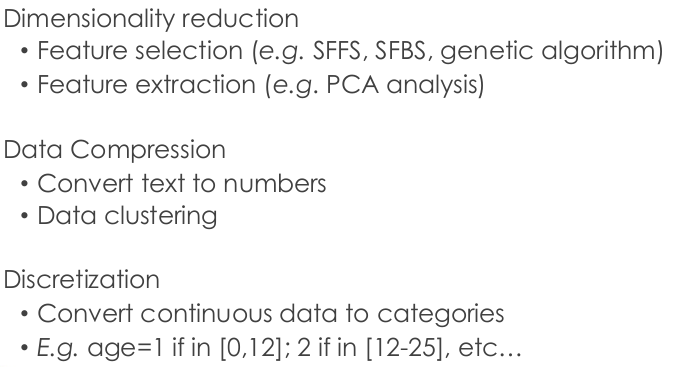

In [3]:
import pandas as pd
import numpy as np

In [5]:
cellphones_df_raw = pd.read_csv(
    cellphones_file_path
)

In [6]:
cellphones_df_raw.head()

,Dung lượng RAM,Wi-Fi,Loại CPU,4star,Tính năng đặc biệt,3star,Ổ cứng,Bluetooth,old_price,Chất liệu tấm nền,Loại card đồ họa,Khe đọc thẻ nhớ,item_name,Hệ điều hành,2star,Công nghệ màn hình,Công nghệ âm thanh,5star,comment_count,Độ phân giải màn hình,Webcam,Kích thước,Loại RAM,Độ phân giải,Trọng lượng,Màn hình cảm ứng,Cổng giao tiếp,1star,Chất liệu,url,Kích thước màn hình,Đèn bàn phím,Pin,special_price
0,8GB,Wi-Fi 6: 802.11ax,10th Gen Intel Core i5 processor – 1035G1,0,"Ổ cứng SSD, Wi-Fi 6, Màn hình cảm ứng, Viền mà...",0,SSD: 256GB,Bluetooth Wireless 5.0,25.990.000,Tấm nền IPS,Intel UHD Graphics,Không,Surface Laptop Go Core i5 / 8GB / 256 GB / 12....,Windows 10 Home in S mode,0,"Công nghệ màn hình PixelSense, cảm ứng đa điểm...","Mics Studio trường xa kép, Loa Omnisonic với D...",0,76,1536 x 1024 pixels,Camera HD 720p f2.0,278.18 mm x 205.67 mm x 15.69 mm,LPDDR4x,Full HD,"1,110 g",Có,1 cổng USB-C 1 cổng USB-A 1 cổng 3.5 mm headph...,0,Vỏ kim loại,https://cellphones.com.vn/surface-laptop-go-25...,12.4 inches,NaN,NaN,21.590.000
1,8GB,Wi-Fi 6: 802.11ax,10th Gen Intel Core i5 processor – 1035G1,0,"Ổ cứng SSD, Wi-Fi 6, Màn hình cảm ứng, Viền mà...",0,SSD: 128GB,Bluetooth Wireless 5.0,23.990.000,Tấm nền IPS,Intel UHD Graphics,Không,Surface Laptop Go Core i5 / 8GB / 128 GB / 12....,Windows 10 Home in S mode,0,"Công nghệ màn hình PixelSense, cảm ứng đa điểm","Mics Studio trường xa kép, Loa Omnisonic với D...",0,164,1536 x 1024 pixels,"Camera 720p, khẩu độ f2.0",278.18 mm x 205.67 mm x 15.69 mm,LPDDR4x,Full HD,"1,110 g",Có,1 cổng USB-C 1 cổng USB-A 1 cổng 3.5 mm headph...,0,NaN,https://cellphones.com.vn/surface-laptop-go.html,12.4 inches,NaN,Lên đến 13 giờ (Tùy vào nhu cầu sử dụng),19.790.000
2,8GB,Intel Wi-Fi 6(Gig+)(802.11ax) (2x2),Intel Core i5-1135G7 2.4GHz up to 4.2GHz 8MB,0,"Ổ cứng SSD, Wi-Fi 6",0,512GB SSD M.2 PCIE G3X2 (1 slot),v5.0,25.290.000,Tấm nền OLED/AMOLED,Intel Iris Xe Graphics,Có,Laptop ASUS ZenBook UX325EA-KG363T,Windows 10 Home SL,0,"60 Hz, 400 nits, Độ phủ màu100% DCI-P3",Harman Kardon,0,74,1920 x 1080 pixels (FullHD),HD Web Camera,30.42 x 20.3 x 1.39 ~ 1.39 cm,LPDDR4X 3200MHz,Full HD,1.14kg,NaN,2x Thunderbolt 4 USB-C (supports display / pow...,0,Vỏ kim loại,https://cellphones.com.vn/laptop-asus-zenbook-...,13.3 inches,Có,4 Cell,23.590.000
3,4GB,WiFi 802.11ac,Intel Core i5-1035G1 ( 1.0 GHz - 3.6 GHz / 6MB...,0,Ổ cứng SSD,0,256GB SSD M.2 NVMe,v5.0,13.990.000,Tấm nền IPS,Intel UHD Graphics,NaN,Laptop Acer Aspire 3 A315-56-502X NX.HS5SV.00F,Windows 10 Home SL,0,"15.6"" ( 1920 x 1080 ) Full HD không cảm ứng ...",2 Loa,0,187,1080 x 1920 pixels (FullHD),HD Camre,36.34 x 24.75 x 1.99 cm,"DDR4 2400MHz, 1 khe cắm, hỗ trợ tối đa 12GB",Full HD,1.7 kg,Không,"1 x HDMI, 1 x USB 3.1 , 2 x USB 2.0 , LAN 1 Gb/s",0,NaN,https://cellphones.com.vn/laptop-acer-aspire-3...,15.6 inches,Không,"2 cell 36 Wh, Pin liền",13.790.000
4,8GB,802.11b/g/n/ac,Core i5 1135G7 2.4Ghz-8Mb,0,Ổ cứng SSD,0,256 GB PCIe® NVMe™ M.2 SSD,v5.0,19.990.000,NaN,Intel® Iris® Xe Graphics,Có,Laptop HP 15-HP 15 T-DW300 1A3Y3AV,Windows 10 Home SL,0,NaN,NaN,0,15,1366 x 768 pixels (HD+),HD 720p,35.84 x 24.21 x 1.98 cm,"8GB (2x4GB) DDR4-2666, 2 khe cắm tối đa 16GB",HD,1.75 kg,Không,1 x multi-format SD media card reader 1 x Supe...,0,Vỏ nhựa,https://cellphones.com.vn/laptop-hp-15-hp-15-t...,15.6 inches,Không,"3-cell, 41 Wh",17.290.000
